<a href="https://colab.research.google.com/github/gnbhub/gnb_2022_1_Ai_team2/blob/master/week5/changbeom5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [513]:
# /content/drive/MyDrive/GnB/ai/영화 관객수/movies_test.csv
# /content/drive/MyDrive/GnB/ai/영화 관객수/movies_train.csv
# /content/drive/MyDrive/GnB/ai/영화 관객수/submission.csv

In [514]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive_path = "/content/drive/MyDrive/GnB/ai/영화 관객수/"

train = pd.read_csv(drive_path + "movies_train.csv")
test = pd.read_csv(drive_path + "movies_test.csv")
submission = pd.read_csv(drive_path + "submission.csv")

print(train.shape, test.shape, submission.shape)
train.keys()

'''
우리가 예측 목표로 하는 관객수는 케이스가 나눠진 데이터가 아니므로 분류 방법이 아닌 회귀방법을 이용하여 값을 예측하여야 함
그에 따라 예측 모델, 평가 지표도 케이스 분류와는 다를 것을 예상
앞의 내용들을 돌아보면 2주차는 케이스 분류, 3주차는 값 예측, 4주차는 케이스 분류임을 알 수 있음.
'''

(600, 12) (243, 11) (243, 2)


'\n우리가 예측 목표로 하는 관객수는 케이스가 나눠진 데이터가 아니므로 분류 방법이 아닌 회귀방법을 이용하여 값을 예측하여야 함\n그에 따라 예측 모델, 평가 지표도 케이스 분류와는 다를 것을 예상\n앞의 내용들을 돌아보면 2주차는 케이스 분류, 3주차는 값 예측, 4주차는 케이스 분류임을 알 수 있음.\n'

In [515]:
train.head(3)
# 목표 변수 box_off_num

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083


In [516]:
test.head(3)
# box_off_num 열 없음(테스트용)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7


In [517]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [518]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [519]:
'''
dir_prev_bfnum: 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의
                평균 관객수(단 관객수가 알려지지 않은 영화 제외)
dir_prev_bfnum 열의 결측값이 많음을 알 수 있음. 나머지 11개의 열은 결측값 없음
해당 열의 결측값은 너무 많아서 정보 가치가 없으므로 삭제.
''' 

train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

'''
영화 제목과 감독의 이름은 너무 다양하고 서로 연관이 없는 문자 데이터이므로 관객수를 
예상하는데 도움이 되지 않는데이터이다.
그러므로 삭제.
'''

train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distributor    600 non-null    object
 1   genre          600 non-null    object
 2   release_time   600 non-null    object
 3   time           600 non-null    int64 
 4   screening_rat  600 non-null    object
 5   dir_prev_num   600 non-null    int64 
 6   num_staff      600 non-null    int64 
 7   num_actor      600 non-null    int64 
 8   box_off_num    600 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 42.3+ KB


In [520]:
train.describe(include = 'all')

,distributor,genre,release_time,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num
count,600,600,600,600.000000,600,600.000000,600.000000,600.000000,6.000000e+02
unique,169,12,330,NaN,4,NaN,NaN,NaN,NaN
top,CJ 엔터테인먼트,드라마,2015-10-22,NaN,청소년 관람불가,NaN,NaN,NaN,NaN
freq,54,221,6,NaN,204,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,100.863333,NaN,0.876667,151.118333,3.706667,7.081818e+05
std,NaN,NaN,NaN,18.097528,NaN,1.183409,165.654671,2.446889,1.828006e+06
min,NaN,NaN,NaN,45.000000,NaN,0.000000,0.000000,0.000000,1.000000e+00
25%,NaN,NaN,NaN,89.000000,NaN,0.000000,17.000000,2.000000,1.297250e+03
50%,NaN,NaN,NaN,100.000000,NaN,0.000000,82.500000,3.000000,1.259100e+04
75%,NaN,NaN,NaN,114.000000,NaN,2.000000,264.000000,4.000000,4.798868e+05


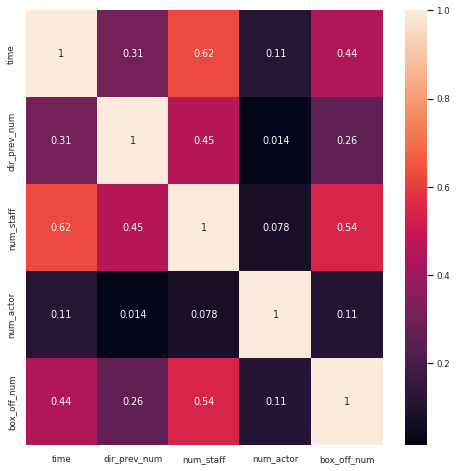

'\n숫자형 데이터로 구성된 열 중에 관객수는 상영시간과 스텝수와 상관관계가\n큼을 알 수 있음.\n또한 상영시간과 스텝수의 상관계수도 0.62로 서로 상관관계가\n큼을 알 수 있음.\n'

In [521]:
plt.figure(figsize = (8,8))
sns.set(font_scale = 0.8)
sns.heatmap(train.corr(), annot = True, cbar = True);
plt.show()

'''
숫자형 데이터로 구성된 열 중에 관객수는 상영시간과 스텝수와 상관관계가
큼을 알 수 있음.
또한 상영시간과 스텝수의 상관계수도 0.62로 서로 상관관계가
큼을 알 수 있음.
'''

In [522]:
plot_cols = ['box_off_num','time','num_staff', 'dir_prev_num']
plot_data = data.loc[:, plot_cols]
plot_data.head()

,box_off_num,time,num_staff,dir_prev_num
0,23398.0,96,91,0
1,7072501.0,130,387,2
2,6959083.0,123,343,4
3,217866.0,101,20,2
4,483387.0,108,251,1


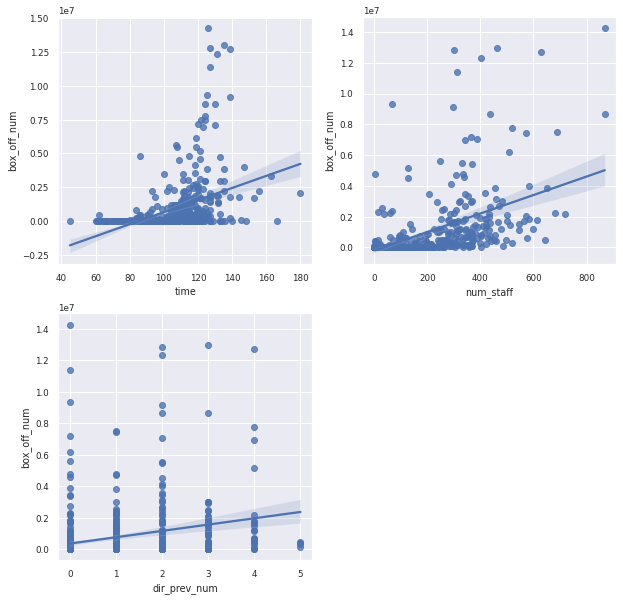

'\n상관계수 상위 3개의 데이터로 관객수에 대한 regplot을 그려 봤음\n상영시간과 스탭수가 그나마 선형적인 모습을 보임\n사실 선형 회귀가 별로 적합하진 않아보임\n하지만 베이스라인을 위해 일단 선형 회귀로 예측을 해보겠음\n'

In [523]:
plt.figure(figsize = (10, 10))
for idx, col in enumerate(plot_cols[1: ]):
  ax1 = plt.subplot(2, 2, idx+1)
  sns.regplot(x = col, y = plot_cols[0], data = plot_data, ax = ax1)
plt.show()

'''
상관계수 상위 3개의 데이터로 관객수에 대한 regplot을 그려 봤음
상영시간과 스탭수가 그나마 선형적인 모습을 보임
사실 선형 회귀가 별로 적합하진 않아보임
하지만 베이스라인을 위해 일단 선형 회귀로 예측을 해보겠음
'''

In [524]:
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train, test], axis = 0)
print(data.shape)

(843, 10)


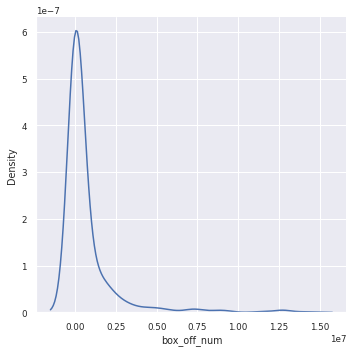

In [525]:
sns.displot(x = 'box_off_num', kind='kde', 
            data = data[data['TrainSplit']=='Train'])
plt.show()

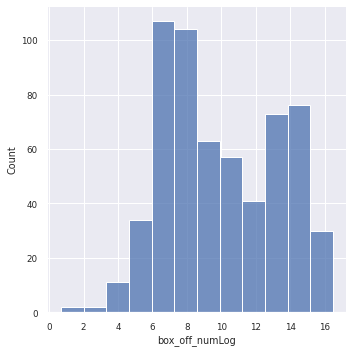

In [526]:
data['box_off_numLog'] = np.log1p(data['box_off_num'])

sns.displot(x = 'box_off_numLog', kind='hist',
            data = data[data['TrainSplit']=='Train'])
plt.show()

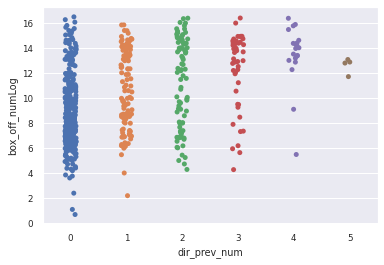

'\n 일반적으로 감독의 전 작품수에 관계없이 관객수는 고르게 분포하지만\n 감독의 전 작품수가 높을수록 최소 관객수는 증가하는 경향은 확인할 수 있음\n '

In [527]:
sns.stripplot(x = 'dir_prev_num', y='box_off_numLog',
            data = data[data['TrainSplit']=='Train'])
plt.show()
'''
 일반적으로 감독의 전 작품수에 관계없이 관객수는 고르게 분포하지만
 감독의 전 작품수가 높을수록 최소 관객수는 증가하는 경향은 확인할 수 있음
 '''

In [528]:
data_num = data.loc[:, ['time', 'dir_prev_num',
                        'num_staff', 'num_actor', 'box_off_num']]

selected_features = ['time', 'dir_prev_num',
                     'num_staff', 'num_actor']
                    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_scaled = data_num.iloc[:, :-1]
scaler.fit(data_scaled)
data_scaled = scaler.transform(data_scaled)

data_num.iloc[:, :-1] = data_scaled[:, :]
data_num.head()
# 피쳐 스케일링

,time,dir_prev_num,num_staff,num_actor,box_off_num
0,0.028354,0.000000,0.104718,0.08,23398.0
1,0.045570,0.333333,0.445339,0.12,7072501.0
2,0.042025,0.666667,0.394707,0.16,6959083.0
3,0.030886,0.333333,0.023015,0.24,217866.0
4,0.034430,0.166667,0.288838,0.08,483387.0


In [529]:
x_train = data_num.loc[data['TrainSplit']=='Train', selected_features]
y_train = data_num.loc[data['TrainSplit']=='Train', 'box_off_num']

x_test = data_num.loc[data['TrainSplit']=='Test', selected_features]

print("Train 데이터셋 크기: ", x_train.shape, y_train.shape)
print("Test 데이터셋 크기: ", x_test.shape)

Train 데이터셋 크기:  (600, 4) (600,)
Test 데이터셋 크기:  (243, 4)


In [530]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                            shuffle = True, random_state = 20)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr, y_tr)

print("회계귀수(기울기): ", np.round(lr.coef_, 1))
print("상수항(절편): ", np.round(lr.intercept_, 1))
# 선형회귀 방법으로 예측 모델을 만듦

회계귀수(기울기):  [37314296.8    83676.9  4240704.3  1399974. ]
상수항(절편):  -1339004.7


In [531]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor (max_depth = 3, random_state = 12)
rfr.fit(x_tr, y_tr)
# 랜덤포레스트 회귀 방법으로 예측 모델을 만듦

RandomForestRegressor(max_depth=3, random_state=12)

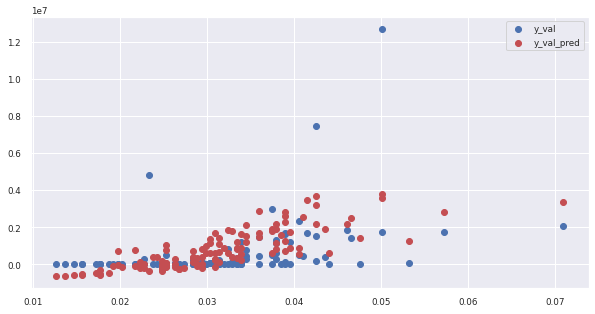

In [532]:
y_val_pred = lr.predict(x_val)

plt.figure(figsize=(10, 5))
plt.scatter(x_val['time'], y_val, label = 'y_val')
plt.scatter(x_val['time'], y_val_pred, c='r', label = 'y_val_pred')
plt.legend(loc = 'best')
plt.show()
# 선형회귀, 상영시간으로 예측한 관객수

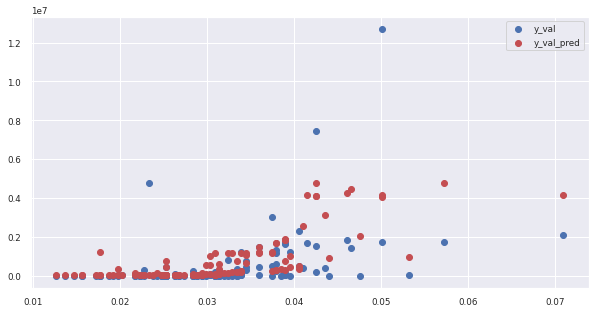

In [533]:
y_val_pred = rfr.predict(x_val)

plt.figure(figsize=(10, 5))
plt.scatter(x_val['time'], y_val, label = 'y_val')
plt.scatter(x_val['time'], y_val_pred, c='r', label = 'y_val_pred')
plt.legend(loc = 'best')
plt.show()
# 랜덤포레스트, 상영시간으로 예측한 관객수

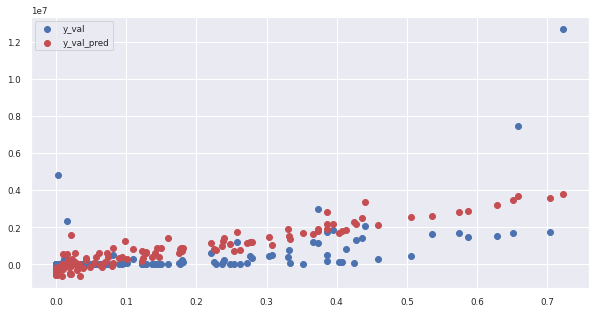

In [534]:
y_val_pred = lr.predict(x_val)

plt.figure(figsize=(10, 5))
plt.scatter(x_val['num_staff'], y_val, label = 'y_val')
plt.scatter(x_val['num_staff'], y_val_pred, c='r', label = 'y_val_pred')
plt.legend(loc = 'best')
plt.show()
# 선형 회귀, 스테프 숫자로 예측한 관객수

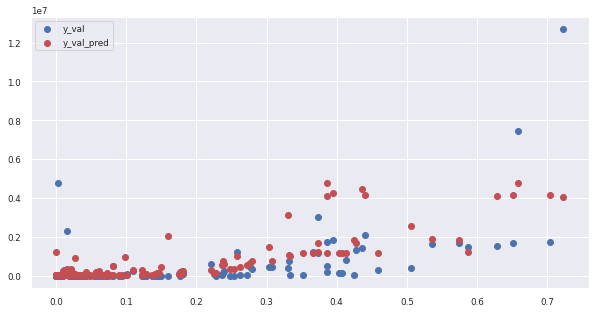

In [535]:
y_val_pred = rfr.predict(x_val)

plt.figure(figsize=(10, 5))
plt.scatter(x_val['num_staff'], y_val, label = 'y_val')
plt.scatter(x_val['num_staff'], y_val_pred, c='r', label = 'y_val_pred')
plt.legend(loc = 'best')
plt.show()
# 랜덤포레스트, 스테프 숫자로 예측한 관객수

In [536]:
from sklearn.metrics import mean_squared_error
y_tr_pred = lr.predict(x_tr)
train_mse = mean_squared_error(y_tr, y_tr_pred)
print("Train MSE: %.0f" % (train_mse/100000000))

y_val_pred = lr.predict(x_val)
test_mse = mean_squared_error(y_val, y_val_pred)
print("Test MSE: %.0f" % (test_mse/100000000))

Train MSE: 24314
Test MSE: 17097


In [537]:
y_tr_pred = rfr.predict(x_tr)
train_mse = mean_squared_error(y_tr, y_tr_pred)
print("Train MSE: %.0f" % (train_mse/100000000))

y_val_pred = rfr.predict(x_val)
test_mse = mean_squared_error(y_val, y_val_pred)
print("Test MSE: %.0f" % (test_mse/100000000))

# train에 데이터에 대한 예측도는 훨씬 좋지만
# test 데이터에 대한 예측도는 오히려 낮음으로 과대적합화 확인 가능

Train MSE: 14967
Test MSE: 17200


In [538]:
y_test_pred = lr.predict(x_test)
submission['box_off_num'] = y_test_pred.astype(int)

submission_filepath = drive_path + 'baseline_num_lr_submission_001.csv'
submission.to_csv(submission_filepath, index = False)
submission.head(5)
# 선형회귀를 이용한 베이스라인 파일

,title,box_off_num
0,용서는 없다,1946330
1,아빠가 여자를 좋아해,1605983
2,하모니,2556537
3,의형제,2227810
4,평행 이론,1907865


In [539]:
# 피처 엔지니어링, 베이스라인 공유 코드 참고
train = pd.read_csv(drive_path + "movies_train.csv")
test = pd.read_csv(drive_path + "movies_test.csv")
submission = pd.read_csv(drive_path + "submission.csv")

train.distributor.value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [540]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [541]:
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [542]:
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [543]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [544]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [545]:
model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)

RandomForestRegressor()

In [546]:
tr_pred = model.predict(train_x)
pred = model.predict(test)

In [549]:
train_mse = mean_squared_error(train_y, tr_pred)
print("Train MSE: %.0f" % (train_mse/100000000))

Train MSE: 3338


In [550]:
submission = pd.read_csv('/content/drive/MyDrive/GnB/ai/영화 관객수/submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [551]:
submission['box_off_num'] = pred

In [552]:
submission

,title,box_off_num
0,용서는 없다,2558827.93
1,아빠가 여자를 좋아해,1919860.69
2,하모니,1389405.42
3,의형제,2124352.16
4,평행 이론,1034707.99
...,...,...
238,해에게서 소년에게,98560.14
239,울보 권투부,5901.84
240,어떤살인,235299.08
241,말하지 못한 비밀,11449.40


In [553]:
submission.to_csv('베이스라인.csv',index = False)

In [554]:
def plot_importance(model, features):
  importances = model.feature_importances_
  indices = np.argsort(importances)
  feature_names = [features[i] for i in indices]
  feature_imp = importances[indices]

  plt.figure(figsize = (10, 12))
  plt.title('Feature Importances')
  plt.barh(range(len(indices)), feature_imp, align = 'center')
  plt.yticks(range(len(indices)), feature_names)
  plt.xlabel('Relative Importance')

  print('피처: ', list(reversed(feature_names)))
  print('중요도: ', list(reversed(feature_imp)))

  return list(reversed(feature_names)), list(reversed(feature_imp))

In [556]:
train.keys()

Index(['time', 'dir_prev_num', 'num_staff', 'num_actor', 'box_off_num', '년',
       '월', 'distributor_(주)NEW', 'distributor_(주)마운틴픽쳐스',
       'distributor_(주)쇼박스', 'distributor_CJ 엔터테인먼트', 'distributor_기타',
       'distributor_롯데엔터테인먼트', 'genre_SF', 'genre_공포', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리',
       'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       'screening_rat_12세 관람가', 'screening_rat_15세 관람가',
       'screening_rat_전체 관람가', 'screening_rat_청소년 관람불가'],
      dtype='object')

피처:  ['num_staff', 'time', 'num_actor', '년', 'dir_prev_num', 'box_off_num', 'screening_rat_12세 관람가', 'distributor_CJ 엔터테인먼트', 'distributor_(주)쇼박스', '월', 'genre_다큐멘터리', 'distributor_(주)마운틴픽쳐스', 'distributor_롯데엔터테인먼트', 'distributor_기타', 'genre_액션', 'genre_공포', 'genre_애니메이션', 'screening_rat_전체 관람가', 'genre_뮤지컬', 'genre_코미디', 'genre_드라마', 'screening_rat_15세 관람가', 'genre_SF', 'genre_느와르', 'genre_서스펜스', 'distributor_(주)NEW', 'genre_미스터리', 'genre_멜로/로맨스']
중요도:  [0.3613264516674972, 0.2347357080037129, 0.08017710757581359, 0.04853733027205233, 0.04315865504601481, 0.028513822520977273, 0.02434530326261037, 0.02059318843884393, 0.019208977357056546, 0.018867950216553846, 0.0164561314808866, 0.01371436776476668, 0.012294524583926372, 0.011939516005082536, 0.01151748821853557, 0.01087300370923721, 0.010278228487442522, 0.009587668277525255, 0.008742797606258706, 0.006180887594901475, 0.004476029871553177, 0.0015446776226821942, 0.0013729427756882329, 0.0009730053237499754, 0.0004079019665098313, 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_

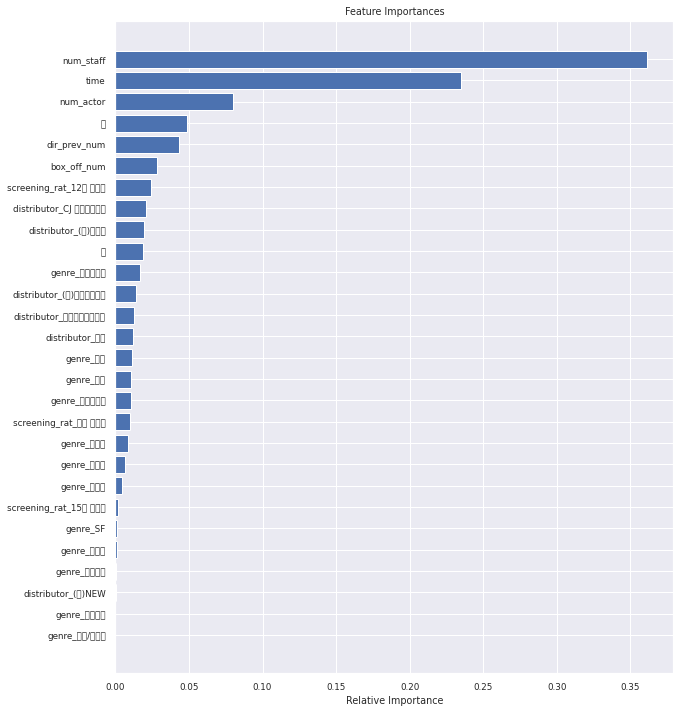

In [557]:
selected_features = ['time', 'dir_prev_num', 'num_staff', 'num_actor', 'box_off_num', '년',
       '월', 'distributor_(주)NEW', 'distributor_(주)마운틴픽쳐스',
       'distributor_(주)쇼박스', 'distributor_CJ 엔터테인먼트', 'distributor_기타',
       'distributor_롯데엔터테인먼트', 'genre_SF', 'genre_공포', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리',
       'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       'screening_rat_12세 관람가', 'screening_rat_15세 관람가',
       'screening_rat_전체 관람가', 'screening_rat_청소년 관람불가']
imp_features, imp_scores = plot_importance(model, selected_features)